# _Cleaning Data with Python_
___

### Diagnóstico

Antes de realizar cualquier trabajo sobre nuestros datos es importante tomarnos un tiempo para explorar su naturaleza. Hay ciertos puntos que, por lo general, debemos tomar en cuenta sobre nuestros datos:

* Nuestro dataset puede tener inconsistencias en el nombre de sus atributos (columnas), es decir; _–Probablemente los títulos tengan simbolos, espacios en blanco, caracteres erroneos, etc, etc...–_ todo aquello que impida una correcta identificación de ellas.

* "Missin Data" o datos omitidos, por alguna razón, deben ser identificados y localizados.

* "Outliers" suelen ser un proble potencial a la hora de trabajar con nuestros datos. Para ello es necesario conocer más sobre la naturaleza de nuestro dataset para después clasificarlos y entender _–¿ Cuales pueden ser un verdadero problema o cuales no ?.–_

* Registros duplicados.

* La asignación de formatos erroneos en los registros de los atributos (columnas) pueden traernos valores equivocados a la hora de procesarlos.


In [65]:
import pandas as pd

In [66]:
df=pd.read_csv('pagpoly.csv')
df.head()

,UNITNO,MAP_SYMBOL,STATE,NAME,AGE,LITH1,LITH2,LITH3
0,*56,Dne,PENSILVANIA,Northeast Shale,Devonian,Shale,Siltstone,NaN
1,*55,Dg,PENSILVANIA,Girard Shale,Devonian,Argillaceous shale,Siltstone,NaN
2,*54,Dch,PENSILVANIA,Chadakoin Formation,Devonian,Siltstone,Sandstone,Shale
3,*1,Qs,PENSILVANIA,Sands of Presque Isle,Quaternary,Sand,NaN,NaN
4,*28,NaN,PENSILVANIA,NaN,NaN,NaN,NaN,NaN


Si deseamos imprimir cierta parte de nuestro dataset, por que así lo hemos deseado, podemos echar mano de las siguientes métodos:

* `DataFrame.head()` nos arrojará los primeros 5 renglones de nuestro dataset.

* `DatarFrame.tail()` nos arrijará los últimos 5 renglones de nuestro dataset.

* `DataFrame.shape` nos arroja el número de renglones y de columnas de nuestro dataset. Por ejemplo: –_El dataset **df** tiene un "shape" **(14478, 7)**. Es decir; que se compone de 14,478 regnglones y 7 atributos (columnas)–._

Dos de los atributos más importantes en _Pandas_, para un _DataFrame_, son `.columns` e `.info()`. Nos ayudan a identificar errores en los títulos de los atributos, caracteres erroneos o identificar valores omitidos por alguna razón o el tipo de formato en los regitros de los atributos.

In [67]:
df.columns

Index(['UNITNO', 'MAP_SYMBOL', 'STATE', 'NAME', 'AGE', 'LITH1', 'LITH2',
       'LITH3'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UNITNO      14480 non-null  object
 1   MAP_SYMBOL  14476 non-null  object
 2   STATE       14480 non-null  object
 3   NAME        14474 non-null  object
 4   AGE         14476 non-null  object
 5   LITH1       14476 non-null  object
 6   LITH2       13486 non-null  object
 7   LITH3       12213 non-null  object
dtypes: object(8)
memory usage: 905.1+ KB


Para los siguientes ejemplos es necesario aislar los siguiente atributos; `UNITNO`, `NAME` y `AGE` en un nuevo dataframe, al cual llamaremos `df_subset`.

In [69]:
df_subset=df[['UNITNO','STATE','NAME','AGE']]
df_subset.head()

,UNITNO,STATE,NAME,AGE
0,*56,PENSILVANIA,Northeast Shale,Devonian
1,*55,PENSILVANIA,Girard Shale,Devonian
2,*54,PENSILVANIA,Chadakoin Formation,Devonian
3,*1,PENSILVANIA,Sands of Presque Isle,Quaternary
4,*28,PENSILVANIA,NaN,NaN


Si volvemos a consultar la información de nuestro nuevo dataframe `df_subset` vemos que la columna `UNITNO` tiene un tipo de dato `object`. Esto es por que; _–el signo `*` antepuesto a las cantidades es conciderado como texto, lo cual impide representar a estos atributos como números–._ El siguiente paso será eliminarlos y cambiar el formato a dichos atributos por un caracter numérico.

Si observamos el primer dataframe `df` nos encontramos que; la cantidad de objetos para cada atributo es de un total de **14,478**. Pero en los atributos restantes sus registros reportan una cantidad menor. Los registro de de estos atributos se concideran omitidos o sin ningúna representación por el momento. Por ejemplo: `MAP_SYMBOL`, `LITH1`, `LITH2`,`LITH3`... son algunos atributos con registros omitidos.

In [70]:
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UNITNO  14480 non-null  object
 1   STATE   14480 non-null  object
 2   NAME    14474 non-null  object
 3   AGE     14476 non-null  object
dtypes: object(4)
memory usage: 452.6+ KB
None


### Análisis explotratorio de datos.

Hay dos maneras de realizar rapidamente un análisis exploratorio de nuestros datos. Una es contando las frecuencias de los valores únicos para cada registro. La otra es obteniendo estadísticas básicas en los atributos. _Python_ nos permite hacer esto mediante los métodos: `.value_counts(dropna=False)` y `df.describe()`

Los siguientes métodos son aplicados para una exploración rápida en el dataset:

1.- `DataFrame.column_name.value_counts(dropna=False)` nos arroja el conteo de las frecuencias para cada record. _–El parámetro `dropna = False` nos permite visualizar los valores que podrían ser omitidos en la columna.–_ 

2.- `DataFrame['columname'].value_counts(dropna=False)` es otra manera de realizar lo anterior.
    
3.- `DataFrame.describe()` arroja una estadística básica para cada uno de los atributos en el dataframe. Este método es solo se aplica cuando las columnas son de tipo numérico.

Al aplicar estos métodos a los atributos `STATE` y `NAME` se observan los siguientes casos:

* no todos los registros en el atributo `STATE` son de Pensilvania. Esto es curioso, sobre todo si decimos que el dataset contiene solamente aplicaciones para este estado.

* en el atributo `AGE` observamos 4 valores `NaN` que habrá que investigar.

In [71]:
df_subset.STATE.value_counts(dropna=False)

PENSILVANIA    14479
WYOMING            1
Name: STATE, dtype: int64

In [72]:
(print(df['AGE'].value_counts(dropna=False)))

Pennsylvanian                 5905
Ordovician                    1558
Mississippian                 1209
Cambrian                       977
Devonian                       809
Precambrian                    674
Permian                        609
Triassic                       604
Mississippian and Devonian     517
Permian and Pennsylvanian      470
Silurian                       396
Probably lower Paleozoic       353
Tertiary                       119
Devonian and Silurian          110
Jurassic                       110
Ordovician and Cambrian         30
Cretaceous                      17
Quaternary                       8
NaN                              4
Mowry Shale                      1
Name: AGE, dtype: int64


### Análisis explotratorio visual de datos.

Hasta ahora hemos estado explorando analíticamente los registros para tratar de encontrar algúna anomalía _(outliers)_ en la información del dataset. Sin embargo podemos apoyarnos de graficos para poder explorar más estos casos.

Los gráficos como _histogramas_ y _los boxplots_ son herramientas que nos ayudan en atributos que contienen datos númericos. Por ejemplo para el atributo `Existing Zoning Sqft` utlizamos la función **plot()**, de la librería _matplotlib_, con el parámetro `kind = hist` para poder imprimir un histograma. 

Antes comensaremos obteniendo rápidamente algunos datos estadísticos para su pre-evaluación y para ello harémos uso de un nuevo _Dataset_. Este nuevo archivo (`ssnmx_01-12_2019.csv`) contiene los registros sísmicos para la republica mexicana, en el periodo _enero 2019 - diciembre 2020_. Además se ha tratado la información para poder ejemplificar algunas cuestiones referentes a este tema. 

In [73]:
df_ssn=pd.read_csv('ssnmx_01-12_2019.csv')
df_ssn

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,2019-01-01,00:06:23,3.5,16.2010,-97.6130,16.1,"28 km al NOROESTE de RIO GRANDE, OAX",2019-01-01,06:06:23,revisado
1,2019-01-01,00:45:58,2.8,32.1832,-115.2490,20.1,"18 km al SUROESTE de GPE VICTORIA(KM.43), BC",2019-01-01,06:45:58,revisado
2,2019-01-01,00:54:06,3.2,16.8403,-97.6925,9.9,"47 km al SUR de H TLAXIACO, OAX",2019-01-01,06:54:06,revisado
3,2019-01-01,01:16:36,3.3,16.1272,-97.4227,16.4,"13 km al NORTE de RIO GRANDE, OAX",2019-01-01,07:16:36,revisado
4,2019-01-01,01:16:40,3.1,16.4152,-98.1633,23.4,"14 km al NOROESTE de PINOTEPA NACIONAL, OAX",2019-01-01,07:16:40,revisado
...,...,...,...,...,...,...,...,...,...,...
26421,2019-12-31,21:30:13,3.6,16.3800,-94.9500,15,"10 km al SURESTE de JUCHITAN DE ZARAGOZA, OAX",2020-01-01,03:30:13,verificado
26422,2019-12-31,22:26:12,3.6,15.3800,-94.6900,16,"104 km al SURESTE de SALINA CRUZ, OAX",2020-01-01,04:26:12,verificado
26423,2019-12-31,22:44:48,3.9,15.4700,-95.0800,22,"79 km al SUR de SALINA CRUZ, OAX",2020-01-01,04:44:48,verificado
26424,2019-12-31,22:47:43,3.3,16.3200,-98.2300,12,"20 km al OESTE de PINOTEPA NACIONAL, OAX",2020-01-01,04:47:43,verificado


Inmediatamente podemos hacer un barrido exploratorio con la función `info()` como ya lo vimos en ejemplos anteriores. Podrémos observar que nuestro _Dataset_ contiene `26425` registros (eventos). Sin embargo a simple vista no podríamos identificar datos que nos puedan ensuciar la información. Estos casos pueden ser; _outliers_, _incompatibilidad con el formato de sus atributos_, _valores_ `NaN` o `Null`, _entre otros_...

In [74]:
df_ssn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26426 entries, 0 to 26425
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       26426 non-null  object 
 1   Hora                        26426 non-null  object 
 2   Magnitud                    26426 non-null  float64
 3   Latitud                     26426 non-null  float64
 4   Longitud                    26426 non-null  float64
 5   Profundidad                 26426 non-null  object 
 6   Referencia de localizacion  26426 non-null  object 
 7   Fecha UTC                   26426 non-null  object 
 8   Hora UTC                    26426 non-null  object 
 9   Estatus                     26426 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.0+ MB


Sin tener mucho conocimiento o experiencia en el _análisis exploratorio de datos_ podemos observar de primera cuenta que el atributo `Profundidad` está clasificado como `object` (_cadena_), a pesar de que los valores reportados en esta columna deberían ser números. _Python_ por defecto clasifica como `object` a cualquier registro que desde su archivo fuente (para este caso `ssnmx_01-12_2019.csv`) contenga caractéres o cadenas (_texto_) en sus atributos.

Para tratar de solucionar esta observación podemos indicarle a _Pandas_ que abra nuestro archivo cambiando el formato del atributo `Profundidad` por `float` (decimal). El parámetro que debemos pasarle a pandas es `dtype={'atributo':type}`. Con esto deberíamos poder visualizar nuestro _DataFrame_ correctamente.

In [75]:
df_ssn=pd.read_csv('ssnmx_01-12_2019.csv', dtype={'Profundidad':float})
df_ssn

ValueError: could not convert string to float: 'menos de 1'

Al no tener exito podemos pensar que no es cuestión del formato en nuestro atributo. Seguramente de debe a algo más. Muchas veces hay registros `NaN`,`Null`, registros con caractéres como `*`,`$`,`#` antepuestos, y como ya vimos en el ejemplo anterior no son posibles transformarlos.

Si somos observadores en la imprsión de nuestro mensaje de error _Pandas_ nos arroja este mensaje:
```pyhton

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader.read()

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._read_low_memory()

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._read_rows()

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._convert_column_data()

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._convert_tokens()

ValueError: could not convert string to float: 'menos de 1'
```
Lo que intenta decirnos este mensaje es que: _–existen registros que no pueden ser convertidos en números, tal es el caso de registros como `menos de 1`–_. Podemos hacer caso y buscar cuales son los registros que cumplen esta condición en. Para ello hay que hacer un filtrado en el atributo `Profundidad`, donde sus registros cumplan con la condición de ser cadenas de texto con el valor igual a `menos de 1`.

In [76]:
string=df_ssn[df_ssn['Profundidad']=='menos de 1']
string

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
14551,2019-07-12,04:47:41,2.0,19.4077,-99.1950,menos de 1,"menos de 1 km al NOROESTE de MIGUEL HIDALGO, CDMX",2019-07-12,09:47:41,revisado
14561,2019-07-12,07:38:28,2.7,19.4049,-99.1959,menos de 1,"1 km al SUROESTE de MIGUEL HIDALGO, CDMX",2019-07-12,12:38:28,revisado
14566,2019-07-12,10:08:04,2.4,19.4049,-99.1939,menos de 1,"menos de 1 km al SUROESTE de MIGUEL HIDALGO, CDMX",2019-07-12,15:08:04,revisado
14607,2019-07-13,01:35:36,2.4,19.4075,-99.1952,menos de 1,"menos de 1 km al OESTE de MIGUEL HIDALGO, CDMX",2019-07-13,06:35:36,revisado
14641,2019-07-13,11:39:20,2.4,19.3920,-99.2173,menos de 1,"2 km al SUROESTE de V ALVARO OBREGON, CDMX",2019-07-13,16:39:20,revisado
14859,2019-07-16,23:10:52,2.6,19.4028,-99.2102,menos de 1,"1 km al NOROESTE de V ALVARO OBREGON, CDMX",2019-07-17,04:10:52,revisado
14860,2019-07-16,23:18:46,2.4,19.4019,-99.2138,menos de 1,"1 km al OESTE de V ALVARO OBREGON, CDMX",2019-07-17,04:18:46,revisado
14869,2019-07-17,00:41:36,2.4,19.3983,-99.2173,menos de 1,"2 km al OESTE de V ALVARO OBREGON, CDMX",2019-07-17,05:41:36,revisado
14871,2019-07-17,00:45:53,2.4,19.4010,-99.2130,menos de 1,"1 km al OESTE de V ALVARO OBREGON, CDMX",2019-07-17,05:45:53,revisado
14874,2019-07-17,01:04:24,2.4,19.3980,-99.2158,menos de 1,"2 km al OESTE de V ALVARO OBREGON, CDMX",2019-07-17,06:04:24,revisado


Vemos que efectivamente hay una cantidad pequeña de registros que cumplen esta condición. Aquí es donde nuestro sentido sobre el análisis que deseamos efectuar decidirá si eliminar estos datos o tratar de buscar una solución para no perderlos. 

Pero antes, nuestro objetivo era transformar el tipo de dato de estos valores de cadena a numérico independientemente si cumplian con la condición o no. Si volvemos a realizar un filtro al _DataFrame_
`df_ssn` podemos seleccionar aquellos valores que cumplan con la condición opuesta, o sea, que se seleccionen aquellos registros, de en el atributo `Profundidad`, que no cumplan con la condición de ser iguales a `menos de 1`. Este nuevo _DataFrame_ lo llamarémos `df_ssn_clean`.

In [77]:
df_ssn_clean=df_ssn.loc[df_ssn['Profundidad']!='menos de 1']
df_ssn_clean

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,2019-01-01,00:06:23,3.5,16.2010,-97.6130,16.1,"28 km al NOROESTE de RIO GRANDE, OAX",2019-01-01,06:06:23,revisado
1,2019-01-01,00:45:58,2.8,32.1832,-115.2490,20.1,"18 km al SUROESTE de GPE VICTORIA(KM.43), BC",2019-01-01,06:45:58,revisado
2,2019-01-01,00:54:06,3.2,16.8403,-97.6925,9.9,"47 km al SUR de H TLAXIACO, OAX",2019-01-01,06:54:06,revisado
3,2019-01-01,01:16:36,3.3,16.1272,-97.4227,16.4,"13 km al NORTE de RIO GRANDE, OAX",2019-01-01,07:16:36,revisado
4,2019-01-01,01:16:40,3.1,16.4152,-98.1633,23.4,"14 km al NOROESTE de PINOTEPA NACIONAL, OAX",2019-01-01,07:16:40,revisado
...,...,...,...,...,...,...,...,...,...,...
26421,2019-12-31,21:30:13,3.6,16.3800,-94.9500,15,"10 km al SURESTE de JUCHITAN DE ZARAGOZA, OAX",2020-01-01,03:30:13,verificado
26422,2019-12-31,22:26:12,3.6,15.3800,-94.6900,16,"104 km al SURESTE de SALINA CRUZ, OAX",2020-01-01,04:26:12,verificado
26423,2019-12-31,22:44:48,3.9,15.4700,-95.0800,22,"79 km al SUR de SALINA CRUZ, OAX",2020-01-01,04:44:48,verificado
26424,2019-12-31,22:47:43,3.3,16.3200,-98.2300,12,"20 km al OESTE de PINOTEPA NACIONAL, OAX",2020-01-01,04:47:43,verificado


Si deseamos, hasta aquí, podemos trabajar con el resto de los datos sin esta condición. La fucnión `astype()` nos otorga la posibilidad de agregar un diccionario, como parámetro, para indicar que atributo y a que nuevo formato deseamos transformarlo. 

In [78]:
df_ssn_clean = df_ssn_clean.astype({"Profundidad": float})
df_ssn_clean

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,2019-01-01,00:06:23,3.5,16.2010,-97.6130,16.1,"28 km al NOROESTE de RIO GRANDE, OAX",2019-01-01,06:06:23,revisado
1,2019-01-01,00:45:58,2.8,32.1832,-115.2490,20.1,"18 km al SUROESTE de GPE VICTORIA(KM.43), BC",2019-01-01,06:45:58,revisado
2,2019-01-01,00:54:06,3.2,16.8403,-97.6925,9.9,"47 km al SUR de H TLAXIACO, OAX",2019-01-01,06:54:06,revisado
3,2019-01-01,01:16:36,3.3,16.1272,-97.4227,16.4,"13 km al NORTE de RIO GRANDE, OAX",2019-01-01,07:16:36,revisado
4,2019-01-01,01:16:40,3.1,16.4152,-98.1633,23.4,"14 km al NOROESTE de PINOTEPA NACIONAL, OAX",2019-01-01,07:16:40,revisado
...,...,...,...,...,...,...,...,...,...,...
26421,2019-12-31,21:30:13,3.6,16.3800,-94.9500,15.0,"10 km al SURESTE de JUCHITAN DE ZARAGOZA, OAX",2020-01-01,03:30:13,verificado
26422,2019-12-31,22:26:12,3.6,15.3800,-94.6900,16.0,"104 km al SURESTE de SALINA CRUZ, OAX",2020-01-01,04:26:12,verificado
26423,2019-12-31,22:44:48,3.9,15.4700,-95.0800,22.0,"79 km al SUR de SALINA CRUZ, OAX",2020-01-01,04:44:48,verificado
26424,2019-12-31,22:47:43,3.3,16.3200,-98.2300,12.0,"20 km al OESTE de PINOTEPA NACIONAL, OAX",2020-01-01,04:47:43,verificado


In [79]:
df_ssn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26413 entries, 0 to 26425
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       26413 non-null  object 
 1   Hora                        26413 non-null  object 
 2   Magnitud                    26413 non-null  float64
 3   Latitud                     26413 non-null  float64
 4   Longitud                    26413 non-null  float64
 5   Profundidad                 26413 non-null  float64
 6   Referencia de localizacion  26413 non-null  object 
 7   Fecha UTC                   26413 non-null  object 
 8   Hora UTC                    26413 non-null  object 
 9   Estatus                     26413 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.2+ MB


Como podemos ver el atributo profundidad cambio de ser `object` a `float`, como tenía que ser desde un principio. Ahora podemos inspeccionar un poco más nuestro _DataFrame_. Podemos utilizar la función `describe()` y obtener más información sobre el atributo `Profundidad`.

In [80]:
df_ssn_clean.Profundidad.describe()

count    26413.000000
mean        35.090145
std        370.733735
min          1.000000
25%         10.000000
50%         16.200000
75%         42.100000
max      60000.000000
Name: Profundidad, dtype: float64

De primera cuenta podemos observar que hay una gran distancia entre el valor máximo y el valor mínimo en nuestros registros **min  1.0 km** y **max  60,000 km**. En primera; sería muy dificil tener confianza en un dato que provenga desde esa profundidad, sobre todo por que no existiría si tomamos en cuenta que el radio de la tierra es de **~6,300 kms** (aprox). EN segunda; estamos hablando de una profundidad mayor a la del núcleo interno, donde ya no existen placas tectónicas, todo se fusionó y se reciclo kilómetros arriba. Entonces es recomendable visualizar como se distribuyen las frecuencias de la `Prifundidad` de nuestros registros en un histograma. 

Para esta ocación ajustaremos logaritmicamente la escala del eje `y` para una visualización más comoda. Utilizamos entonces los parámetros `logy=True` en la función `plot()`:

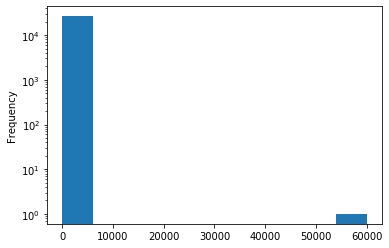

In [81]:
import matplotlib.pyplot as plt
df_ssn_clean['Profundidad'].plot(kind='hist', logy=True )
plt.show()

Como se puede ver; el **histograma**  nos ayuda a visualizar mejor la distribución de frecuencias de nuestros datos, un poco más que la forma analítica. Pero ninguna técnica es mejor que otra ya que antes de utilizar métodos gráficos necesitamos la descripción de nuestro _Dataset_ para esperar entender el resutado de este. Podemos hacernos la siguiente pregunta _–¿hacia que lado se encuentran más cargados nuestros registros?.–_

En el gráfico podemos identificar (según nuestro rapido análisis analítico) que; el **25%, 50% y 75%** de los registros se encuentran hacia la izquierda, con valores menores a los `10,000 km` de `Profundidad`. Y sin embargo, a los lados del registro con mayor valor (última barra azul) no hay casi datos. Por lo cual diremos que este valor es considerado como anómalo.

Los _histográmas_ nos ayudan para visualizar solo una varaiable. Para visualizar multiples variables los _boxplots_ son una gran ayuda, especialmente cuando las varaiables son categóricas. 

In [82]:
df=pd.read_csv('dob_job_application_subset.csv')
df.head()

/home/postgres/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


Para este ejemplo usaremos _boxplots_ para comparar `initial cost` a través de diferentes valores de `Borough` con ayuda del método `.boxplot()` de la librería de **pandas**: `df.boxplot(column='name_column', by='parameter', rot=90)`. Esta gráfica será el resultado de para una nueva variable llamada **df_boxplot** que alojará a los atributos `Initial Cost` y `Borough`.

Ates de graficar es necesario realizar unos cambios en el formato del atributo `Initial Cost`:

* Eliminar `$` del la columna `Initial Cost` : `ini_cost = df['Initial Cost']str.replace('$', '')`.

* Convertir `Initial Cost` a formato `float`: `astype(float)`

* Creación de la nueva variable **df_boxplot**: `df_boxplt= pd.concat([df['Borough'],ini_cost], axis=1)`.

Una vez realizados estos cambios podemos construir la gráfica de la siguiente manera: `df_boxplt.boxplot(column='Initial Cost', by='Borough', rot=90)`

In [83]:
ini_cost = df['Initial Cost'].str.replace('$', '').astype(float)
df_boxplt= pd.concat([df['Borough'],ini_cost], axis=1)
df_boxplt.head()

,Borough,Initial Cost
0,MANHATTAN,75000.0
1,STATEN ISLAND,0.0
2,MANHATTAN,30000.0
3,MANHATTAN,1500.0
4,MANHATTAN,19500.0


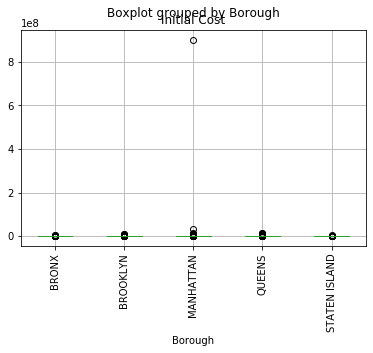

In [84]:
df_boxplt.boxplot(column='Initial Cost', by='Borough', rot=90)
plt.show()

Observamos que hay dos _outliers_ en _"Manhatan"_ esto se debe a que es uno de los lugares más caros y por lo tanto es normal. Este es un claro ejemplo cuando hay que tener en cuenta e identificar muy bien &mdash; _¿ qué consideramos ouliers y qué no ?_ &mdash;.

_Boxplot_ es una excelente opción cuando se tiene una columna, con valor numérico, y deseamos compararla con varias atributos. Pero cuando necesitamos visualizar 2 columnas numéricas _Scatter PLots_ es la mejor opción.  

Imprimamos la gráfica con `Initial_cost`, en el eje de las `x` y `total_est_fee` en el eje de las `y`. Utilizaremos el método `.plot` con el parámetro `Kind='scatter'` y noteremos que hay dos _outliers_ que se alcanzan a visualizar. Para ello necesitamos realizar un proceso parecido con **df_boxplt**, donde `Total Est. Fee` del dataframe **df** necesita eliminar `$` y convertirse en una variable `float`.

In [87]:
total_est_fee=df['Total Est. Fee'].str.replace('$', '').astype(float)
df_scatter=pd.concat([ini_cost,total_est_fee], axis=1)
df_scatter.head()

,Initial Cost,Total Est. Fee
0,75000.0,986.0
1,0.0,1144.0
2,30000.0,522.5
3,1500.0,225.0
4,19500.0,389.5


Entonces escribimos la siguiente línea: `df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)` pararealizar la impresión del gráfico _scatter plot_ sobre los atributos `Initia Cost` y `Total Est.Fee`:

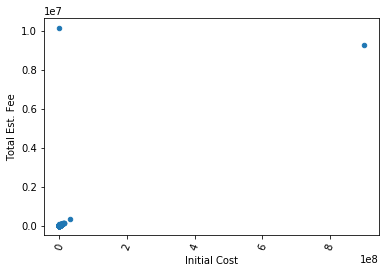

In [88]:
df_scatter.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)
plt.show()

Nuevamente los _outlayers_ se ven presentes.

### Tidy data

Existen do premisas que hacen a un Dataset organizado y consistente:

* Cada atributo estará representando a variables diferentes.

* Los renglones deberán alojar registros únicos e independientes.

* Las dos premisas anteriores forman una Tabla.

Un claro ejemolplo de esto es cuando en lugar de tener atributos (columnas) que representea variables, se tienen valores. Esto es algo que es impresindible identificar.

Por ejemplo: _en el siguiente DataFrame observamos un caso tipico de inconsitencia, ya que los atributos no representan variables, si no valores de la variable "tratamiento"._

Otra observación es que: _para el valor "tratamiento-a" los registros "b" se hacen presentes. Lo cual también indica una inconsitencia para los datos._

In [89]:
tratamiento=['a','b','b','b']
paciente=['Alejandro', 'Gustavo', 'Claudia', 'Mónica']
error={'tratamiento-a':tratamiento, 'beneficiario':paciente}
dict_error=pd.DataFrame(error)
dict_error

,tratamiento-a,beneficiario
0,a,Alejandro
1,b,Gustavo
2,b,Claudia
3,b,Mónica


#### Melting

En ocaciones es necesario trasformar nuestro Dataset en una tabla que tenga un mejor entendimiento o una mejor vista. Uno de los procesos más comunes es realizar un _Melting_ lo que significa transformar las columnas en renglones.

Para el siguiente Dataframe los atributos `Ozone`, `Solar . R`, `Wind` y `Temp` estan representados, cada uno, en una columna. Si por alguna razón necesitamos convertir estos datos en reglones aplicamos el método _melt_. Necesitamos entonces identificar los arámetro `id_vars` y `value_vars`.

* `id_vars` representa las columnas que no deseamos transponer.

* `value_vars` representa las columnas que deseamos convertir en renglones.

El Dataset que vamos a ocupar es en esta ocación es **airquality.csv** y mantengamos en mente que tiene la siguiente estructura (`153,6`) que es igual a `153` registros u observaciones y `6` atributos o variables.

In [90]:
airquality=pd.read_csv('airquality.csv')
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [91]:
airquality_metl=pd.melt(airquality, id_vars=['Month','Day'])
airquality_metl.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


Podemos renombrar los atributos (columnas) una vez usado **melting** en el nuevo _Dataframe_. Solo necesitamos los siguientes parámetros:

* `var_name = 'new_name'` representará el nuevo nombre para nuestro atributo.

* `value_name = 'new_name'` que será el nombre para la nueva columna de los valores transpuestos de nuestro nuevo atributo.


In [92]:
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
airquality_melt.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


#### Pivot

Mientras _melting_ convierte atributos en renglones _pivot_ crea un nuevo atributo, con los valores únicos, a partir de un atributo seleccionado.

`.pivot_table()` necesita los siguientes parámetros:

* `index` será el atributo o atributos que no serán tomados en cuenta en el pivoteo.

* `colums` el nombre de la columna o columnas que deseamos utilizar como pivote.

* `values` los valores que serán utilizados pra el atributo que utilizamos como pivote.

In [93]:
airquality_pivot =airquality_melt.pivot_table(index=['Month','Day'], columns='measurement', values='reading')
airquality_pivot.head()

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3

Para poder regresar al Dataframe original utilizamos el método `reset_index()`. Sin embargo necesitamos crear un supusesto escenario donde accidentalmente los datos en nuestro dataset **airquality** se duplicaron. Las siguientes líneas crearán renglones duplicados para este ejercicio y podremos observar al final que; para el atributo `reading=41` los datos se duplican.

Los datos duplicados estarán alojados en un _Dataframe_ de nombre **airquality_dup**:

In [94]:
airquality_dup=airquality_melt
airquality_dup=airquality_dup.append([airquality_dup]*3, ignore_index=True) 
airquality_dup[airquality_dup['reading']==41]

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
612,5,1,Ozone,41.0
1224,5,1,Ozone,41.0
1836,5,1,Ozone,41.0


Hasta aquí podemos observar que **airquality_pivot** está bajo la operación `pivot_table()` anteriormente realizada. Su construcción es de tipo (`153,4`). Necesesitamos regresar al punto inicial donde la tabla **airquality**, antes de ser procesada varias ocaciones, tenia una construcción (`153,6`).

`reset_index()` necesita los siguientes parámetros:

* `index` serán las columnas que deseamos transponer.

* `values` los valores que serán utiliazados como registros en nuestros atributos después de realizar el pivoteo al Dataset.

* `column` la columna pivote.

* `aggfunc` este método acepta la función de agregación **mean** con la cual agrupará a los datos duplicados por. 

Al final observaremos que **airquality_pivote** tiene de nueva cuenta los mísmo renglones y las mismas columnas como en un principio con el _Dataframe_ **airquality**.

In [95]:
import numpy as np
airquality_pivot = airquality_dup.pivot_table(index=['Month','Day'], columns='measurement', values='reading', aggfunc=np.mean)
airquality_pivot = airquality_pivot.reset_index()
airquality_pivot.head()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


_melting_ y _pivot_ son herramientas que necesitamos continuamente cuando es necesario hacer un _reshaping_. Otro problema muy común es cuando en un mismo atributo (columna) tenemos multiple información alojada. 

#### Separación de caracteres

La tabla **tuberculosis** aloja registros de casos reportados para los atributos `country`, `year`, `gender` y grupo de edades `age group`. El ejercicio  para esta ocasión es obtener dos atributos uno para el simple _genero, `m`, y otra para el rango de edad `0-14...`. Esto se logrará separando los caracteres del título del atributo `age group`.

In [96]:
tb=pd.read_csv('tuberculosis.csv')
tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


Para poder separar este atributo en dos columnas necesitamos realizar un _melting_ pasando como parámetro `id_vars` a `country` y `years` ya que no queremos que estos atributos sufran un cambio. Este proceso será alojado en un nuevo _DataFrame_ llamado **tb_melt**.

In [97]:
tb_melt=pd.melt(tb, id_vars=['country','year'])
tb_melt.head()

,country,year,variable,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


Después es necesario crear los nuevos atributos `gender` y `age_group`. Para ello es necesario apoyarnos de los `slicing` para poder acceder a la posición de los registros en el atributo `variable` del nuevo _Dataframe_ **tb_melt**. Esto lo podemos realizar de la siguiente manera: `DataFrame['new_colum]=DataFrame.variable.str[slicing or string position]`:

In [98]:
tb_melt['gender']=tb_melt.variable.str[0]
tb_melt['age_group']=tb_melt.variable.str[1:]
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014



#### Separación con los métodos split y get.

Observemos los atributos del siguiente _DataFrame_ **ebola**

In [99]:
ebola=pd.read_csv('ebola.csv')
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

Veremos que los títulos se componen de dos partes _Cases_ o _Deaths_ y la segunda parte por _Country_. Si queremos separar los guiones bajos `_` no podemos realizarlo como en el ejercicio anterior. Es necesario utilizar métodos _built-string_ que divide en varias partes una cadena.

Por ejemplo: si al atrubuto `atribute_colum` con registros `Char1_Char2` le aplicamos el meétodo `Cases_Guinea.split('_')`, sobre un nuevo atributo (`atribute_splited`) que anteriormente hayamos creado, tendremos como resultado la división de la cadena ~~`Char1_Char2`~~ según el número de `_` que contengan nuestros registros. Estos serán alojados en una lista (`['Char1','Char2']`) y serán los nuevos registros para el nuevo atributo creado anteriormente (`atribute_splited`). De esta manera apoyados de `.str` y `get()` podremos acceder a los elementos de esta lista y posteriormente separarlos como regitros independientes.

Nuestro nuevo ejercicio será reconstruir, en un _Dataframe_ nuevo, el dataset **ebola**. Este _Dataframe_ deberá contener un atributo `type` para los rcaracteres `Cases` o `Death` y un atributo `Country` para el país según sea el caso. Antes que nada necesitamos procesar el Dataframe **ebola** aplicando _melting_. Anteriormente vimos que la sintaxis para ejecutar el método `melt` era la siguiente: `DataFrame['new_colum]=pd.melt(Dataframe, id_vars=['atribute_col1', 'atribute_col2'], var_name='new_atribute_name', value_name='new_atribute_name')`

Los parámetros en esta ocasión serán:

* `id_vars=['Date','Day']` ya que son los atributos que no veran cambios.

* `var_name='type_country'` que es el nuevo atributo donde se volcarán todos los demás atributos.

* `value_name='counts'` alojará el registro de los atributos volcados.

In [100]:
ebola_melt=pd.melt(ebola, id_vars=['Date','Day'], var_name='type_country', value_name='counts')
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


El siguiente paso es dividir con el metodo `.split()`, el nuevo atributo `type_country`, en dos. Pero antes es necesario crear otro nuevo atributo más (`str_split`) que alojará a la lista con las cadenas divididas.

In [101]:
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


Ahora es turno de crear los atributos finales `type` y `country`. Es aquí donde utilizarémos a los métodos `.str` y `.get()` para extraer los elementos de la lista y asignarlos a los atributos correspondientes.

In [102]:
ebola_melt['type'] = ebola_melt.str_split.str.get(0)
ebola_melt['country'] = ebola_melt.str_split.str.get(1)
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


### Concatenación de datos

#### Combinación de datos.

El Dataset **nyc_uber_2014.csv** contiene datos de **Nueva York** de **UBER**. Este ejercicio constará en reunir _concatenar_ 3 archivos **uber_4**, **uber_5** y **uber_6** en uno solo, parecido al de **nyc_uber_2014.csv**

Sin embargo antes de empezar es necesario la creación de los archivos que contengan los datos para cada mes:

* El primer paso es poder manipular mejor el _Dataset_  y para eso es necesario cambiar de nombre al atributo `Data/Time` por `dt_time`.

* Hay que identificar cada mes en el _Dataset_ por mese, podemos hacer esto usando `.split` y `get()` sobre el nuevo atributo `dt_time`.

* Creamos 3 datasets de nombre **uber_n**, donde **n** es el número correspondiente del mes.

El código de estas operaciónes se muestran acomtinuación:

* Creación del atributo `dt_time`:

    ```python
    uber=pd.read_csv('nyc_uber_2014.csv')
    uber=uber.rename(columns ={'Date/Time':'dt_time'})
    uber['dt_split']=uber.dt_time.str.split('/')
    ```
    
 
* Construcción del _Dataset_ **uber_n**, para **n** igual al mes correspondiente:

    ```python
    uber['month'] = uber.dt_time.str[0].astype(int)
    uber_n=uber[uber['month']==n]
    uber_n.drop(['dt_split','month'],axis=1).to_csv('uber_n.csv',sep=',', index=0)
    ```

Lo siguiente será cargar cada uno de estos _Dataframes_ para poder trabajr con ellos. Desúés se realizará un procedimiento para no tener que cargar los _Datasets_ individualmente.

In [103]:
uber4=pd.read_csv('uber_4.csv')
uber5=pd.read_csv('uber_5.csv')
uber6=pd.read_csv('uber_6.csv')

Después de haber cargado los _Dataset_ en variables individuales es hora de utilizar `pd.concat()` que resivirá, como parámetros, una lista con cada una de las variables:

In [104]:
row_concat=pd.concat([uber4,uber5,uber6])
row_concat.tail()

,Unnamed: 0,dt_time,Lat,Lon,Base
94,94,6/1/2014 6:27:00,40.7554,-73.9738,B02512
95,95,6/1/2014 6:35:00,40.7543,-73.9817,B02512
96,96,6/1/2014 6:37:00,40.7751,-73.9633,B02512
97,97,6/1/2014 6:46:00,40.6952,-74.1784,B02512
98,98,6/1/2014 6:51:00,40.7621,-73.9817,B02512


#### Combinación de atributos.

Para el siguiente ejemplo necesitamos crear dos _Datasets_ a partir de `ebola_melt`, `ebola_melt2` y `status_country`. 

La atarea es unir estos dos _Datasets_, con varios atributos, en uno solo. Necesitamos usar el método `concat` cuyos parámetros son: una lista con los _Dataframes_ y el parámetro `axis=1`:

In [106]:
ebola_melt2=ebola_melt.iloc[:,0:3]
status_country=ebola_melt.iloc[:,5:7]

El nuevo _Dataframe_ se llamará **ebola_tidy**.

In [109]:
ebola_tidy=pd.concat([ebola_melt2,status_country], axis=1)
ebola_tidy.head()

,Date,Day,type_country,type,country
0,1/5/2015,289,Cases_Guinea,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,Cases,Guinea


### Busqueda y concatenación de patrones.

#### Coicidencia de patrones.

En ocaciones es necesario concatenar una gran variedad de archivos o _Datasets_. Realizarlo manualmente sería una tarea poco funcional. 

Sin embargo _Python_ nos provee de funciones que nos ayudan a realizar estas tareas de una manera outomatizada.

<br>
<blockquote>
    <p style="font-style: italic; color:#737373; text-align:justify"> &mdash; El módulo glob busca las rutas de archivos que hagna coicidir con una serie de caracteres (wildcarts) parecidas al de "shell" en UNix como *,?,etc,etc... &mdash;
</p>
</blockquote><div style="text-align:right; width:100%"><cite style="font-style: italic; color:#737373; text-align:right">– Manual de Python...</cite></div>
<br>    
</div>
</font>

En el ejercicio anterior donde teníamos que cargar los diferentes _Datasets_ de **UBER** para cada uno de los meses, y con ellos poder construir un solo _Dataframe_, era necesario cargar uno por uno. Pero si quisiéramos realizar la concatenación de diferentes _Datasets_ sin tener que hacerlo uno por uno basta con realizar los siguientes pasos:

* Asegurarse que la función **glob** este cargada para poder trabajar con ella.

* Creamos una nueva variable llamada **pattern** que alojará, en una cadena y acompañado del wildcart `*` más el patron de archivos que agrupará. Por ejemplo `uber*.csv`.

* Los nombres de los diferentes archivos serán guardados en una lista. Para ello es necesario utilizar el método `.glob` de la función `glob()`. Ejmplo `csv_files = glob.glob(pattern)`

In [110]:
import glob 
pattern = 'uber*.csv'
csv_files = glob.glob(pattern)

Hasta aquí hemos podido indicarle a _Python_ que es necesario que agrupe todos archovos de formato `.csv` por que queremos realizar una unión de todos ellos. Ahora solo resta ingresar a cada uno de los nombres para corroborar que todos se encuentren cargados y listos para usarse.

```python
print(csv_files)
['uber_4.csv', 'uber_5.csv', 'uber_6.csv']
```

Para acceder a uno de llos es necesario ejecutar la consulta de la siguiente manera:

```python
some_csv=pd.read_csv(csv_files[index])
some_csv
```

In [111]:
uber_csv=pd.read_csv(csv_files[1])
uber_csv.head()

,Unnamed: 0,dt_time,Lat,Lon,Base
0,0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


#### Iteración y concaqtenación

Ahora que ya tenemos una lista de _Datasets_ para poder utilizar podemos realizar un loop, como anteriromente, habíamos planteado para poder unirlos y no tener que definirlos uno por uno para que podamos juntarlos.

* En primer lugar necesitamos una lista vacia para poder iterar a cada archivo **.csv**. La llamaremos `frames = []`

* Después creamos el loop para poder iterar a cada uno de los archivos. Ejemplo:

```python
for iter in frames:
    DataFrame=pd.read_csv(iter)
    frames.append(DataFrame)
uber=pd.concat(frames)
```

Como podemos observar el loop realizará la extracción, la lectura y la concatenación de todos los archivos por nocotros.

In [112]:
frames=[]
for csv in csv_files:
    df=pd.read_csv(csv)
    frames.append(df)
uber=pd.concat(frames)
uber.sample(20)

,Unnamed: 0,dt_time,Lat,Lon,Base
30,30,6/1/2014 0:40:00,40.7610,-73.6035,B02512
57,57,5/1/2014 4:41:00,40.7695,-73.9621,B02512
52,52,6/1/2014 1:38:00,40.7392,-73.9953,B02512
4,4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
57,57,6/1/2014 2:03:00,40.7408,-74.0079,B02512
35,35,4/1/2014 5:24:00,40.7393,-73.9974,B02512
52,52,4/1/2014 5:56:00,40.7442,-73.9854,B02512
72,72,4/1/2014 6:25:00,40.7382,-74.0033,B02512
61,61,6/1/2014 2:19:00,40.7195,-73.9887,B02512
77,77,5/1/2014 5:29:00,40.6951,-74.1784,B02512


### Cruce de datos (Merge).


La concatenación no es el único método que se puede utilizar a la hora de combinar datos. Sobre todo cuando el atributo que deseamos concatenar no tiene el mísmo orden en ambos atributos del _Datasets_. 

`.merge()` es una función que le permite a _Pandas_ poder realizar el cruce de datos, con base en un atributo presente en ambos _Datasets_, de manera similar que con _SQL_. La consulta se llevaría a cabo con los siguientes parámetros:

* `left=dataset` y `rigth=dataset` ambos deberán contener el mismo atributo y pueden tener, o no, el mismo nombre.

* `on=None` se utiliza cuando el atributo objetivo aparece con el mismo nombre en ambos _Datasets_. Si no el valor será `None`.

* `left_on='atribute_a'` & `rigth_on='atribute_b'` cuando el atributo objetivo aparece, en ambos datasets, con diferente nombre.

Existen diferentes maneras de realizar un _join_.

#### merge 1-to-1.

Imaginemos que necesitamos realizar el cruze de la información de dos _Datasets_ `visited` & `site`. Si observamos, en ambas columnas, existe un atributo que comparten ambas tablas pero con diferente nombre. Uno es `name` en el _Dataset_ `site` y otro es `site` en el _Dataset_ `site`. El resultado es necesario guardarlo en un nuevo _Dataset_ llamada **o2o**.

Para poder cruzar los datos en el atributo que tienen en particualr ambas tablas la línea sería: 

In [114]:
site = pd.read_csv('site.csv')
visited = pd.read_csv('visited.csv')
o2o=pd.merge(left=site, right=visited, on=None, left_on='name', right_on='site')
o2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


#### merge many to one (one to many).

Cuando se tienen registros duplicados

In [115]:
dup_visited=pd.read_csv('dup_visited.csv')
m2o = pd.merge(left=site,right=dup_visited, left_on='name',right_on='site')
m2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


#### merge many to many.

In [117]:
survey=pd.read_csv('dup_visited.csv')
survey.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [118]:
survey=pd.read_csv('survey.csv')
m2m = pd.merge(left=m2o, right=survey, left_on='ident', right_on='taken')
m2m

,name,lat,long,ident,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,DR-1,-49.85,-128.57,844,DR-1,1932-03-22,844,roe,rad,11.25
5,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,sal,8.41
6,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,lake,rad,0.05
7,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,temp,-21.50
8,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,pb,rad,7.22
9,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,NaN,sal,0.06


### Tips de datos.

#### Conversión entre tipos de datos.

En muchas ocaciones es necesario realizar la conversión entre diferentes tipos de datos. El tipo de dato `object` es el tipo de dato que _Python_ utiliza para codificar caracteres. Los atributos numéricos pueden ser transformados a caracteres y viceversa. El método `astype()` nos ayuda a realizar la conversión.

Por lo general cuando leemos _Datasets_ damos por hecho que cada uno de los atributos que estámos cargando son los correctos. En otras ocasiones necesaitamos cambiar el tipo de dato, en uno o varios atributos, para poder trabajar con sus datos. El parámetro, de la fucnión `read_csv`, que me permite realizar esto es `dtype = {'atribute1':select_dtype,'atrubute2':select_dtype,...}`.

Para efectos de este ejercicio leeremos el archivo **tups.csv** para el cual es necesario cambiar el tipo de dato a los atributos `total_bill` y `tip`. Después chequemos la información con la fucnión `info()` para observar los diferentes tipos de datos de los atributos.

In [119]:
tips=pd.read_csv('tips.csv', dtype={'total_bill':object,'tip':object} )
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   total_bill  244 non-null    object
 1   tip         244 non-null    object
 2   sex         244 non-null    object
 3   smoker      244 non-null    object
 4   day         244 non-null    object
 5   time        244 non-null    object
 6   size        244 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 13.5+ KB


Otra de las ventajas de hacer cambios en los tipos de datos es el ganar memoria. En algunos casos el tipo de dato que presenta un atributo no es el más funcional para nuestro análisis. Por ejemplo; el mejor tipo de dato para el atributo  `sex` o `smoker` sería `'category'` en lugar de `object`.

Podemos realizar el cambio utilizando la función `astype()` y el argumento `'category'`. Si de nueva cuenta checamos la información del _Dataset_ para observar los cambios, además de reducir el tamaño de uso en emoria de `13.4+ KB` a `10.3+ KB`:

In [120]:
tips.sex = tips.sex.astype('category')
tips.smoker=tips.smoker.astype('category')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    object  
 1   tip         244 non-null    object  
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(2), int64(1), object(4)
memory usage: 10.3+ KB


### Manipulación de caracteres.

#### Empate de caracteres con expresiones regulares.

La mayoría de los _Datasets_ están construidos por caracteres. Es por eso que su manipulación se vuelve de suma importancia para pocer hacer consistente nuestros datos y poder trabajr con ellos.

_Python_ proporciona herramientas para poder manipular caracteres, como el modulo `re` (expresiones regulares o regex) cuyo trabajo es empatar secuencias de caracteres. Es parecida al modulo `glob` y las _wildcarts_. 

A continuación ejemplificaremos alguas secuencias de caracteres y sus correspondientes expresiones regulares::

* `17` cantidades con datos de tipo entero pueden ser reemplazados por la expresión regular: `\d*`.

* `$17` para empatar cantidades como la anterior, pero con el signo `$`, son equivalentes a colocar: `\$\d*`.

* `$17.00` números enteros, con "n" cantidad de decimales, son equivalentes a tener: `\$\d*\.\d*`.

* `$1234567.12 ` esta catidad contiene muchos dígitos, y después del punto decimal solo dos. Podemos localizar estas cantidades: `\$\d*\.\d{2}`

* `$1234567.123` con cantidades de más de 3 dígitos la consulta debería de ser así: `^\$\d*\.\{2}$`

* Utilizamos `[A-Z]` para hallar mayúsculas, seguida de `\w*` que busca "n" cantidad de datos alfanuméricos en una cadena. 

Averiguemos si, es posible saber si dado el formato de un código de la forma `xxx-xxx-xxx` coincide si ingresamos un código manualmente. Para ello utilizamos el modulo `re` y su método `compile` quien alojará el formato del código de caracteres. El metodo `match` realiza la comparación y nos regresa un resultado de tipo _Booleano_.

Probemos con dos códigos: `1123-456-7890` y `123-456-7890`

In [123]:
import re
prog = re.compile('xxx-xxx-xxxx')
result = prog.match('123-456-7890')
result2 = prog.match('123-456-7890')
print(bool(result2))

False


#### Extracción de valores numéricos desde caracteres.

Esta tarea es, a menudo, muy realizada. En la siguiente cadena: `la receta lleva 10 fesas y 1 platano` nos interesa extraer los valores `10` y `1`. Cuando necesitamos extraer valores con varios, donde los caracterers corresponden a varios patrones de coincidencias, la fucnión `findall()` nos es de gran ayuda. Esta nos regresa, en una lista, todas las coincidencias que hayamos indicado encontrar.

Entonces `\d` nos ayuda a encontrar números. Esta _regex_ es precedida de `+` para que se repita varias veces la búsqueda. Esto nos asegura que el número `10` es visualizado como un número solo y no la combinación de `1` y `0`.

In [124]:
matches = re.findall('\d+', 'la receta lleva 10 fesas y 1 platano')
matches

['10', '1']

Reconocimiento para el formato de un número telefónico de la forma `xxx-xxx-xxx`.

In [125]:
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
pattern1

True

Reconocimiento, en una cadena de caracteres, números con el formato de dos cifras decimales `$123.45`.

In [126]:
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
pattern2

True

Coincidencia de letras mayúsculas en la palabra `Australia`

In [127]:
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
pattern3

True

#### Rutinas para la limpieza de datos

Podemos automatizar la limpieza en un _Dataset_ programando rutinas que hacen eficiente este proceso. Por ejemplo; el _Dataset_ **nan.csv** contiene 5 columnas donde se alojan records de tipo `NaN`.

Nuestro trabajo será propgramar una rutina que: pueda reconocer si un redord, en una de las columnas del _Dataset_ **nan.csv**, es menor que `3` lo pueda etiquetar como `Malo`. Si es mayor o igual a `3` lo pueda etiquetar como `Bueno`. Pero si no cumple con ninguna de las condiciones anteriores lo pueda etiquetar como `No aplicó`.

Para este ejercico necesitamos crear el _Dataset_ con valores random y para poder trabajar con el siguiente código;

```python
np.random.seed(123)
data = np.random.randint(0, 10, (10,5))
df_nan = pd.DataFrame(data, columns=list('abcde'))
df_nan = df.where(df > 2)
df_nan.to_csv('nan.csv', sep=',', index=False)
```
La sintaxis de la función que llamaremos como `look` necesita la siguiente estructura;

```python
# Definimos la función 'function_name' con el parámetro 'par':
def function_name(par):

    # Regresa 'respuesta' cuando condición:
    if condición :
        return 'Respuesta'
    
    # Regresa 'Bueno' cuando condición:
    elif condición:
        return 'Respuesta'
    
    # Cuando no se cumpla ninguna de las condiciones:    
    else:
        return 'Respuesta'

# Alicamos la función creando una columna al dataframe:
df['new_colum'] = df.column.apply(function_name)
```

In [128]:
df_look=pd.read_csv('nan.csv')
def look(val):

    if val <= 3:
        return 'Malo'
    
    elif val >3:
        return 'Bueno'
    
    else:
        return '$No aplicó'
    
df_look['columna_a'] = df_look.a.apply(look)
df_look

,a,b,c,d,e,columna_a
0,NaN,NaN,6.0,NaN,3.0,$No aplicó
1,9.0,6.0,NaN,NaN,NaN,Bueno
2,9.0,NaN,NaN,9.0,3.0,Bueno
3,4.0,NaN,NaN,4.0,NaN,Bueno
4,7.0,3.0,NaN,4.0,7.0,Bueno
5,NaN,4.0,8.0,NaN,7.0,$No aplicó
6,9.0,3.0,4.0,6.0,NaN,Bueno
7,5.0,6.0,NaN,NaN,8.0,Bueno
8,3.0,5.0,NaN,NaN,6.0,Malo
9,NaN,4.0,4.0,6.0,3.0,$No aplicó


Observamos que en el nuevo _Dataframe_, la columna `columna_a`, contiene records `$No aplicó`. Ahora supongamos que necesitamos limpiar esos records, pero en lugar de hacerlo como en el paso anterior nos apoyaremos con la función `replace()` y con la ayuda de la construcción de una función **lambda**. 

Las funciones **lambda** tienen la siguiente sintaxis:

```python
df['new_column'] = df.column.apply(lambda iter: iter.replace('$', ''))
```
donde `iter` es nuestro valor para iterar.

In [129]:
df_look['nueva_columna_a'] = df_look.columna_a.apply(lambda x: x.replace('$', ''))
df_look

,a,b,c,d,e,columna_a,nueva_columna_a
0,NaN,NaN,6.0,NaN,3.0,$No aplicó,No aplicó
1,9.0,6.0,NaN,NaN,NaN,Bueno,Bueno
2,9.0,NaN,NaN,9.0,3.0,Bueno,Bueno
3,4.0,NaN,NaN,4.0,NaN,Bueno,Bueno
4,7.0,3.0,NaN,4.0,7.0,Bueno,Bueno
5,NaN,4.0,8.0,NaN,7.0,$No aplicó,No aplicó
6,9.0,3.0,4.0,6.0,NaN,Bueno,Bueno
7,5.0,6.0,NaN,NaN,8.0,Bueno,Bueno
8,3.0,5.0,NaN,NaN,6.0,Malo,Malo
9,NaN,4.0,4.0,6.0,3.0,$No aplicó,No aplicó


### Trabajar con valores duplicados y valores de tipo "NaN".

#### Eliminación de valores duplicados.

Trabajar con valores duplicados puede traernos varios inconvenientes. Ocupan especio extra en la memoria y pueden producir errores en nuestros cálculos. 
_**Pandas**_ nos provee de funciones que nos ayudan a la eliminación de estos valores. Para este ejercicio crearemos un nuevo _Dataframe_ llamado **df_lookrep** con algunos valores repetidos. EL objetivo será eliminar estos registros aplicandole el método `drop_duplicates()`. 

Según la información del tataframe **df_look** debemos tener un total de 10 renglones. 

In [130]:
df_lookrep = pd.concat([df_look]*3, ignore_index=True)
df_lookrep

,a,b,c,d,e,columna_a,nueva_columna_a
0,NaN,NaN,6.0,NaN,3.0,$No aplicó,No aplicó
1,9.0,6.0,NaN,NaN,NaN,Bueno,Bueno
2,9.0,NaN,NaN,9.0,3.0,Bueno,Bueno
3,4.0,NaN,NaN,4.0,NaN,Bueno,Bueno
4,7.0,3.0,NaN,4.0,7.0,Bueno,Bueno
5,NaN,4.0,8.0,NaN,7.0,$No aplicó,No aplicó
6,9.0,3.0,4.0,6.0,NaN,Bueno,Bueno
7,5.0,6.0,NaN,NaN,8.0,Bueno,Bueno
8,3.0,5.0,NaN,NaN,6.0,Malo,Malo
9,NaN,4.0,4.0,6.0,3.0,$No aplicó,No aplicó


Como se podrá ver el _Dataframe_ **clean_dflook** volverá a tener los mismos renglones que en un principio tenia **df_look**.

In [131]:
clean_dflook=df_lookrep.drop_duplicates()
clean_dflook

,a,b,c,d,e,columna_a,nueva_columna_a
0,NaN,NaN,6.0,NaN,3.0,$No aplicó,No aplicó
1,9.0,6.0,NaN,NaN,NaN,Bueno,Bueno
2,9.0,NaN,NaN,9.0,3.0,Bueno,Bueno
3,4.0,NaN,NaN,4.0,NaN,Bueno,Bueno
4,7.0,3.0,NaN,4.0,7.0,Bueno,Bueno
5,NaN,4.0,8.0,NaN,7.0,$No aplicó,No aplicó
6,9.0,3.0,4.0,6.0,NaN,Bueno,Bueno
7,5.0,6.0,NaN,NaN,8.0,Bueno,Bueno
8,3.0,5.0,NaN,NaN,6.0,Malo,Malo
9,NaN,4.0,4.0,6.0,3.0,$No aplicó,No aplicó


#### Elinación de valores de tipo "NaN".

Es muy raro trabajar con datasets que no contengan algún tipo de _missing values_. Se debe tener en cuenta la naturalesa de nuestros datos o su origen para posteriormente tomar las correctas desiciones para poder trabajr con ellos. SObre todo poer que en muchos casos los cálculos no aceptan este tipo de records.

El método `fillna()` nos ayuda a trabajar con los atributos y sustituir estos registros por cualquier otro valor que nosotros necesitemos. Por ejemplo; el _Dataset_ **airquality** tiene un total de **153** registros, pero en el atributo `Ozone` tenemos **116**. Lo cual indica que de alguna manera existen records de tipo `NaN`:

In [132]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Vamos a sustiruir estos records con el valor del promedio del atributo `Ozone`. Para ello necesitaremos ayuda del método `.mean()`. Nuestro nuevos cálculos serán alojados en el mismo _Dataframe_ y en el msimo atributo llamado `Ozone`. Al terminar veremos en la información, del nuevo _Dataset_, que el nuevo valor para el atributo `Ozone` será de **153**:

In [133]:
oz_mean=airquality.Ozone.mean()
airquality['Ozone']=airquality.Ozone.fillna(oz_mean)
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


#### Evaluación en _Datasets_ con "assest".

Esta rutina nos ayudará a verificar si existen records de tipo (`NaN`) en todos los atributos de un _Dataset_. Para ello nos apoyaremos de dos métodos más: `notnull()` y `all()`. `assert` es la función que evaluará esta rutina.

**Nota: podemos utilizar el equivalente que es pd.notnull(df)**.

Verificamos entonces: ¿qué atributos contienen registros `NaN` o `missing values` en el _Dataset_ **ebola**?.. Estos serán etiquetados con `False` en caso de ser así. De momento no abordaremos la explicación del método `all()`.

In [134]:
pd.notnull(ebola).all()

Date                    True
Day                     True
Cases_Guinea           False
Cases_Liberia          False
Cases_SierraLeone      False
Cases_Nigeria          False
Cases_Senegal          False
Cases_UnitedStates     False
Cases_Spain            False
Cases_Mali             False
Deaths_Guinea          False
Deaths_Liberia         False
Deaths_SierraLeone     False
Deaths_Nigeria         False
Deaths_Senegal         False
Deaths_UnitedStates    False
Deaths_Spain           False
Deaths_Mali            False
dtype: bool

La gran parte de este _Dataframe_ contiene records de tipo `NaN`. Para este ejercicio utilizaremos el método `fillna()` para sustituirlos por `0`:

In [135]:
df_ebolafill=ebola.fillna(0)
df_ebolafill

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,66.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0
118,3/26/2014,4,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,3/25/2014,3,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,3/24/2014,2,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora, si ejecutamos de nueva cuenta `pd.notnull(Dataframe).all()` observaremos que todos los atributos tienen records:

In [136]:
pd.notnull(df_ebolafill).all()

Date                   True
Day                    True
Cases_Guinea           True
Cases_Liberia          True
Cases_SierraLeone      True
Cases_Nigeria          True
Cases_Senegal          True
Cases_UnitedStates     True
Cases_Spain            True
Cases_Mali             True
Deaths_Guinea          True
Deaths_Liberia         True
Deaths_SierraLeone     True
Deaths_Nigeria         True
Deaths_Senegal         True
Deaths_UnitedStates    True
Deaths_Spain           True
Deaths_Mali            True
dtype: bool

El método `all()` nos devuelve `True` cuando todos los registros en una consulta son `True`. Cuando se usa `all()`, en un _Dataframe_, para cada uno de los atributos se devuelve una seríe de registros _Booleanos_ (`False` o `True`). Por eso es necesario encadenarlo a otro método `all()`, de nueva cuenta, para que solo regrese `True` si todos los registros en los atributos fueron _True_. 

De esta manera es como podemos verificar que todos los records de un _Dataset_ no contienen valores `NaN`.

In [137]:
assert pd.notnull(df_ebolafill).all().all()